## **Uploading The Dataset**

from google.colab import files
uploaded = files.upload()

**Importing The Necessary Libraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df=pd.read_csv(r"C:\Data Analytics\Machine learning\Log_Regression\credit_card_fraud_dataset.csv")
df

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0
...,...,...,...,...,...,...,...
99995,99996,2024-06-07 00:57:36.027591,1057.29,289,refund,San Antonio,0
99996,99997,2023-10-22 23:12:36.027594,297.25,745,refund,San Antonio,0
99997,99998,2024-05-31 19:27:36.027597,3448.56,690,purchase,San Antonio,0
99998,99999,2024-10-18 09:43:36.027601,3750.79,644,purchase,Philadelphia,0


## **Data Cleaning**

**Checking Null Values**

In [8]:
df.isnull().sum().sum()

0

**Checking Duplicates**

In [9]:
df.duplicated().sum()

0

**Checking Basic Info**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TransactionID    100000 non-null  int64  
 1   TransactionDate  100000 non-null  object 
 2   Amount           100000 non-null  float64
 3   MerchantID       100000 non-null  int64  
 4   TransactionType  100000 non-null  object 
 5   Location         100000 non-null  object 
 6   IsFraud          100000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 5.3+ MB


## **Feature Engineering**
**Dropping Irrelevant features**

In [11]:
df.drop(['TransactionID'],axis=1,inplace=True)

In [12]:
df

,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0
...,...,...,...,...,...,...
99995,2024-06-07 00:57:36.027591,1057.29,289,refund,San Antonio,0
99996,2023-10-22 23:12:36.027594,297.25,745,refund,San Antonio,0
99997,2024-05-31 19:27:36.027597,3448.56,690,purchase,San Antonio,0
99998,2024-10-18 09:43:36.027601,3750.79,644,purchase,Philadelphia,0


**Converting Transactiondate to datetime format**

In [13]:
df['TransactionDate']=pd.to_datetime(df['TransactionDate'])

In [14]:
df['TransactionDate'].dtype

dtype('<M8[ns]')

**Extracting Useful Date Component For Analysis**

In [15]:
df['Hour']=df['TransactionDate'].dt.hour
df['Weekday']=df['TransactionDate'].dt.weekday
df['Day_of_Month']=df['TransactionDate'].dt.day
df['Month']=df['TransactionDate'].dt.month
df['IsWeekend']=df['Weekday'].apply(lambda x:1 if x in [5,6] else 0)#df['IsWeekend']=df['Weekday'].isin([5,6]).astype(int)
df['IsNight']=((df['Hour']>=23)|(df['Hour']<=6)).astype(int)


In [16]:
df

,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud,Hour,Weekday,Day_of_Month,Month,IsWeekend,IsNight
0,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0,14,2,3,4,0,0
1,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0,13,1,19,3,0,0
2,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0,10,0,8,1,0,0
3,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0,23,5,13,4,1,1
4,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0,18,4,12,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2024-06-07 00:57:36.027591,1057.29,289,refund,San Antonio,0,0,4,7,6,0,1
99996,2023-10-22 23:12:36.027594,297.25,745,refund,San Antonio,0,23,6,22,10,1,1
99997,2024-05-31 19:27:36.027597,3448.56,690,purchase,San Antonio,0,19,4,31,5,0,0
99998,2024-10-18 09:43:36.027601,3750.79,644,purchase,Philadelphia,0,9,4,18,10,0,0


**Dropping Extra Baggage**

In [17]:
del df['TransactionDate']

**Encoding Categorical Data**

In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
columns=['Location','TransactionType']
for col in columns:
    df[col] = le.fit_transform(df[col])

In [19]:
df

,Amount,MerchantID,TransactionType,Location,IsFraud,Hour,Weekday,Day_of_Month,Month,IsWeekend,IsNight
0,4189.27,688,1,7,0,14,2,3,4,0,0
1,2659.71,109,1,1,0,13,1,19,3,0,0
2,784.00,394,0,4,0,10,0,8,1,0,0
3,3514.40,944,0,5,0,23,5,13,4,1,1
4,369.07,475,0,6,0,18,4,12,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,1057.29,289,1,7,0,0,4,7,6,0,1
99996,297.25,745,1,7,0,23,6,22,10,1,1
99997,3448.56,690,0,7,0,19,4,31,5,0,0
99998,3750.79,644,0,5,0,9,4,18,10,0,0


**Using DBSCAN To Detect Outliers**

In [20]:
from sklearn.cluster import DBSCAN

best_eps = 0.5
best_min_samples = 4

dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
df['Cluster'] = dbscan.fit_predict(df[['Amount']])

# Check how many points were classified as outliers
outliers = df[df['Cluster'] == -1]
print(f"Number of outliers detected: {len(outliers)}")


Number of outliers detected: 0


**Detecting Outliers Again Using Boxplot For Confirmation**

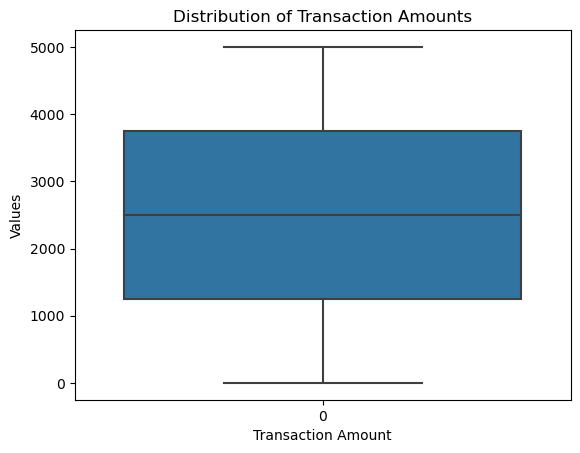

In [21]:
sns.boxplot(df['Amount'])
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Values')
plt.show()

**Correlation Between Features Using A Heatmap**

In [22]:
df.corr()

,Amount,MerchantID,TransactionType,Location,IsFraud,Hour,Weekday,Day_of_Month,Month,IsWeekend,IsNight,Cluster
Amount,1.000000,-0.000386,-0.002321,-0.000348,0.001399,0.000494,-0.001442,-0.000426,0.000327,0.000065,-0.003716,-0.679284
MerchantID,-0.000386,1.000000,-0.002766,-0.001837,0.001157,-0.000222,0.003874,-0.002447,-0.001496,0.004294,-0.004119,0.001031
TransactionType,-0.002321,-0.002766,1.000000,-0.001868,0.001144,-0.000982,0.001749,-0.003668,0.001470,0.001350,-0.002810,0.001545
Location,-0.000348,-0.001837,-0.001868,1.000000,0.000444,-0.000683,-0.000722,-0.000822,-0.000879,-0.003122,-0.001462,-0.003239
IsFraud,0.001399,0.001157,0.001144,0.000444,1.000000,-0.005838,0.000501,-0.002283,-0.004700,-0.000290,0.002325,-0.001638
Hour,0.000494,-0.000222,-0.000982,-0.000683,-0.005838,1.000000,0.005496,0.002577,-0.001788,0.008344,-0.614087,-0.001119
Weekday,-0.001442,0.003874,0.001749,-0.000722,0.000501,0.005496,1.000000,0.015205,0.021534,0.791493,-0.005709,0.000478
Day_of_Month,-0.000426,-0.002447,-0.003668,-0.000822,-0.002283,0.002577,0.015205,1.000000,0.006267,0.025211,-0.000421,0.000670
Month,0.000327,-0.001496,0.001470,-0.000879,-0.004700,-0.001788,0.021534,0.006267,1.000000,0.018379,-0.002786,-0.000155
IsWeekend,0.000065,0.004294,0.001350,-0.003122,-0.000290,0.008344,0.791493,0.025211,0.018379,1.000000,-0.008021,-0.002481


## **Checking For Multicollinearity Between Features**

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

vif = pd.DataFrame()
vif["Feature"] = df.columns
vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
print(vif)


            Feature       VIF
0            Amount  5.287646
1        MerchantID  3.676280
2   TransactionType  1.946832
3          Location  3.193266
4           IsFraud  1.009762
5              Hour  4.838584
6           Weekday  8.134372
7      Day_of_Month  3.841214
8             Month  4.133168
9         IsWeekend  3.675687
10          IsNight  2.078997
11          Cluster  2.641290


**NOTE: Above Weekday and Amount Has a High VIF, so we dig deeper with Correlation Between Features**

**Visualizing With A Heat Map**

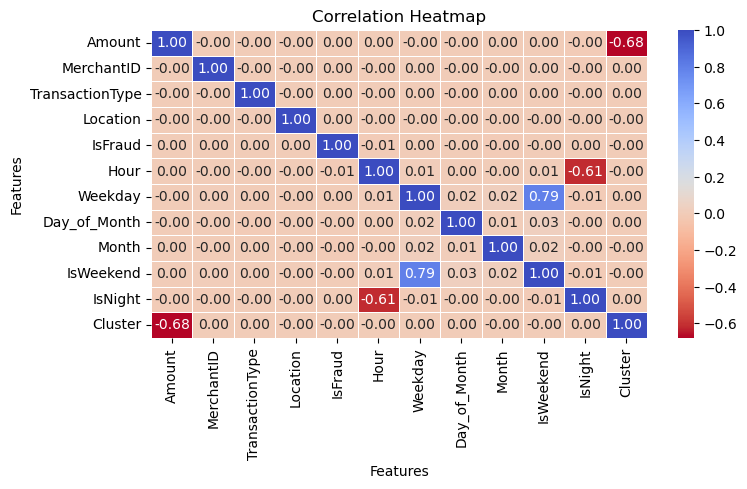

In [24]:
plt.figure(figsize=(8, 4))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm_r',fmt=".2f", linewidths=0.5)
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Correlation Heatmap')
plt.show()

**NOTE: We will drop Isweekend & Cluster columns due to Multicollinearity**

## **Preprocessing For Machine Learning: Standardization**


In [25]:
from sklearn.preprocessing import StandardScaler
X=df.drop(['IsFraud','IsWeekend','Cluster'],axis=1)
y=df['IsFraud']

scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

In [26]:
pd.DataFrame(X_scale,columns=X.columns)

,Amount,MerchantID,TransactionType,Location,Hour,Weekday,Day_of_Month,Month,IsNight
0,1.173161,0.645357,0.997383,0.874292,0.361273,-0.508770,-1.450259,-0.729719,-0.708311
1,0.112740,-1.360085,0.997383,-1.211743,0.216715,-1.009016,0.365086,-1.019723,-0.708311
2,-1.187661,-0.372950,-1.002623,-0.168726,-0.216958,-1.509262,-0.882963,-1.599730,-0.708311
3,0.705284,1.532047,-1.002623,0.178947,1.662294,0.991967,-0.315668,-0.729719,1.411809
4,-1.475326,-0.092396,-1.002623,0.526620,0.939505,0.491722,-0.429127,0.140292,-0.708311
...,...,...,...,...,...,...,...,...,...
99995,-0.998193,-0.736631,0.997383,0.874292,-1.662537,0.491722,-0.996422,-0.149712,1.411809
99996,-1.525117,0.842784,0.997383,0.874292,1.662294,1.492213,0.705464,1.010304,1.411809
99997,0.659638,0.652284,-1.002623,0.874292,1.084062,0.491722,1.726595,-0.439715,-0.708311
99998,0.869169,0.492957,-1.002623,0.178947,-0.361516,0.491722,0.251627,1.010304,-0.708311


## **Logistic Regression**
**Lets Split, Fit,Train Our Model Using Logistic Regression**

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state=42, stratify=y)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## **Model Evaluation**

In [28]:
y_pred = model.predict(X_test)  # Get class labels (0 or 1)


**Accuracy Score**

In [29]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9900


**Classification Report**

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred,zero_division=1))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19800
           1       1.00      0.00      0.00       200

    accuracy                           0.99     20000
   macro avg       0.99      0.50      0.50     20000
weighted avg       0.99      0.99      0.99     20000



**ROC_AUC Score**

In [31]:
from sklearn.metrics import roc_auc_score

# Get probability scores for the positive class (Fraud = 1)
y_prob = model.predict_proba(X_test)[:, 1]

# Compute AUC-ROC score
auc_score = roc_auc_score(y_test, y_prob)

print(f"AUC-ROC Score: {auc_score:.4f}")


AUC-ROC Score: 0.4728


**Confusion Matrix**

In [32]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test, y_pred)

print(cm1)

[[19800     0]
 [  200     0]]


**Visualizing The Confusion Matrix for Better Readability**

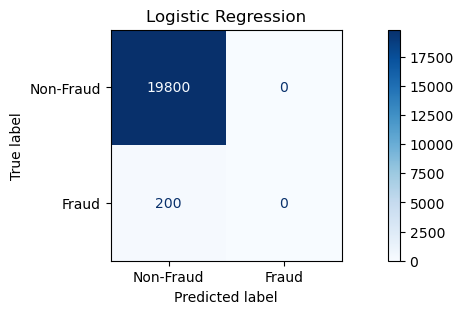

In [33]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(12,3))

cmd1 = ConfusionMatrixDisplay(cm1,display_labels=["Non-Fraud", "Fraud"])
cmd1.plot(cmap="Blues",values_format='d',ax=ax)
ax.set_title("Logistic Regression")

plt.show()

## **Insight Generated:**

- no case was correctly classified as fraud (True Positives - TP).
- no case was wrongly classified as fraud (False Positives - FP).
- 200 fraud cases were missed (False Negatives - FN).
- 19800 case was correctly identified as non-fraud (True Negatives - TN).

Summary:

Our Model cannot detect any single fraud case due to its bias towards the majority class,as such it is performing very poor, so we will use another Model known as XGBoost to Evaluate our Model, due to Its performance with Imbalance dataset

# **XGBOOST MODEL**

**Initialize Model**

In [34]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

# Assuming X is your feature set, y is your target (0 = non-fraud, 1 = fraud)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Set scale_pos_weight to balance the dataset
scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)*165 # Increased weight

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(
    objective="binary:logistic",
    scale_pos_weight=scale_pos_weight,
    eval_metric="auc"
)


**Fit & Train Model**

In [35]:
# Train the model
xgb_model.fit(X_train, y_train)

# Get predicted probabilities
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (fraud)

# **Custom threshold (lower from 0.5 to 0.3)**
threshold = 0.2
y_pred = (y_pred_proba >= threshold).astype(int)  # Convert probabilities to binary labels



## **Model Evaluation**

In [36]:
# Evaluate
print(classification_report(y_test, y_pred,zero_division=1))
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred_proba))

cm2 = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm2)


              precision    recall  f1-score   support

           0       0.99      0.58      0.74     19800
           1       0.01      0.42      0.02       200

    accuracy                           0.58     20000
   macro avg       0.50      0.50      0.38     20000
weighted avg       0.98      0.58      0.73     20000

AUC-ROC Score: 0.5066231060606061
Confusion Matrix:
[[11582  8218]
 [  115    85]]


**NOTE: Using XGBoost, gave us improvement on our Model, though not Perfect**

**Visualizing Our Final Confusion Matrix Comparing it With Our Initial Confusion Matrix**

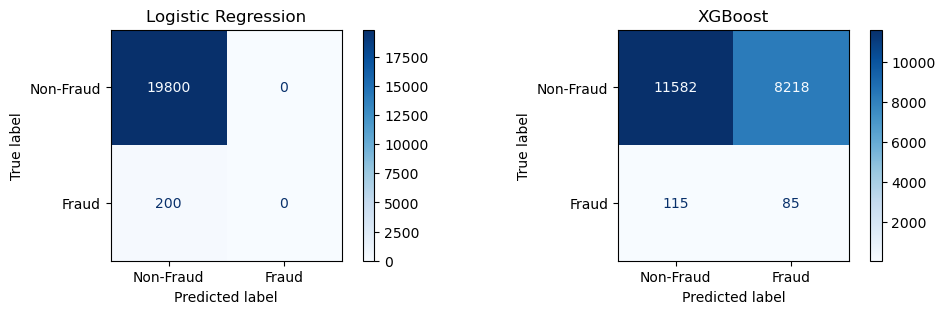

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, axes = plt.subplots(1, 2, figsize=(12,3))

cmd1 = ConfusionMatrixDisplay(cm1, display_labels=["Non-Fraud", "Fraud"])#First Confusion Matrix With Log.Regression
cmd1.plot(ax=axes[0], cmap="Blues", values_format="d")
axes[0].set_title("Logistic Regression")

cmd2 = ConfusionMatrixDisplay(cm2,display_labels=["Non-Fraud", "Fraud"])# Second Confusion Matrix with XGBoost
cmd2.plot(ax=axes[1],cmap="Blues")
axes[1].set_title("XGBoost")
plt.show()

## **Insight Generated:**

- 85 cases were correctly classified as fraud compared to 0 cases previously (True Positives - TP).
- 8218 cases were wrongly classified as fraud compared to 0 previously (False Positives - FP).
- 115 fraud cases were missed compared to 200 cases previously(False Negatives - FN).
- 11582 cases were correctly identified as non-fraud compared to 19800 (True Negatives - TN).

## **Conclusion**
The Model Has shown a remarkable improvement compared to the first model that was using Logistic Regression. Though Its not perfect, but advance tuning can be done through Resampling(undersampling or oversampling such as SMOTE)
